## Confidence Interval - Difference  In Means

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

np.random.seed(42)

df = pd.read_csv('coffee_dataset.csv')
sample_df = df.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [9]:
sample_list =[]
for _ in range(10000):
    sample = sample_df.sample(200, replace=True)
    means_y = sample[sample['drinks_coffee']==True]['height'].mean()
    means_n = sample[sample['drinks_coffee']==False]['height'].mean()
    diff_mean = (means_y - means_n)
    sample_list.append(diff_mean)

(array([  24.,  109.,  546., 1516., 2623., 2826., 1664.,  568.,  106.,
          18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <BarContainer object of 10 artists>)

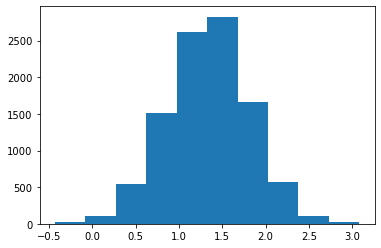

In [10]:
plt.hist(sample_list)

In [12]:
np.percentile(sample_list,0.5),np.percentile(sample_list,99.5)

(0.10258900080921117, 2.538833370796657)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [18]:
sample_df['age'].unique()

array(['<21', '>=21'], dtype=object)

In [19]:
sample_list = []
for _ in range(10000):
    sample = sample_df.sample(200, replace=True)
    sample_over_age = sample[sample['age']=='>=21']['height'].mean()
    sample_under_age = sample[sample['age']=='<21']['height'].mean()
    diff_mean = (sample_over_age - sample_under_age)
    sample_list.append(diff_mean)

(array([   8.,   47.,  329., 1196., 2589., 3084., 1902.,  714.,  117.,
          14.]),
 array([2.84743507, 3.11400025, 3.38056542, 3.64713059, 3.91369577,
        4.18026094, 4.44682611, 4.71339129, 4.97995646, 5.24652163,
        5.51308681]),
 <BarContainer object of 10 artists>)

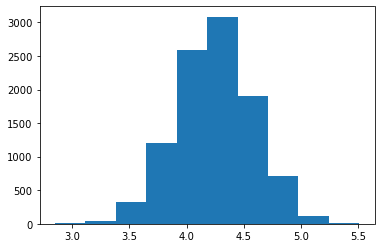

In [20]:
plt.hist(sample_list)

In [21]:
np.percentile(sample_list,0.5), np.percentile(sample_list,99.5)

(3.3652749452554938, 5.0932450670661495)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [32]:
# under 21 years old 
sample_list = []
for _ in range(10000):
    sample = sample_df.sample(200, replace=True)
    sample = sample[sample['age']=='<21']
    mean_y = sample[sample['drinks_coffee']==True]['height'].mean()
    mean_n = sample[sample['drinks_coffee']==False]['height'].mean()
    diff_mean = (mean_y - mean_n)
    sample_list.append(diff_mean)

(array([   5.,   82.,  413., 1382., 2583., 2827., 1846.,  686.,  152.,
          24.]),
 array([-3.36440802, -3.0712282 , -2.77804838, -2.48486856, -2.19168874,
        -1.89850892, -1.6053291 , -1.31214928, -1.01896947, -0.72578965,
        -0.43260983]),
 <BarContainer object of 10 artists>)

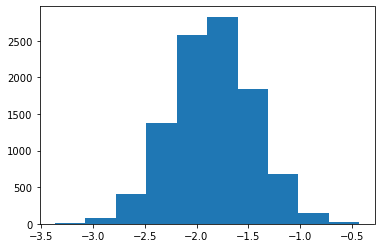

In [33]:
plt.hist(sample_list)

In [34]:
np.percentile(sample_list,2.5), np.percentile(sample_list,97.5)

(-2.6104831869381875, -1.070972788751888)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [66]:
df = pd.read_csv('coffee_dataset.csv')
sample_df = df.sample(200)

In [71]:
sample_list = []
for _ in range(10000):
    sample = sample_df.sample(200, replace=True)
    mean_y = sample.query("age != '>=21' and drinks_coffee == True")['height'].mean()
    mean_n = sample.query("age != '>=21' and drinks_coffee == False")['height'].mean()
    sample_list.append(mean_y - mean_n)

(array([1.200e+01, 1.260e+02, 7.370e+02, 2.180e+03, 3.203e+03, 2.521e+03,
        9.970e+02, 1.950e+02, 2.700e+01, 2.000e+00]),
 array([-2.6567083 , -2.33008538, -2.00346246, -1.67683954, -1.35021662,
        -1.0235937 , -0.69697078, -0.37034786, -0.04372494,  0.28289798,
         0.6095209 ]),
 <BarContainer object of 10 artists>)

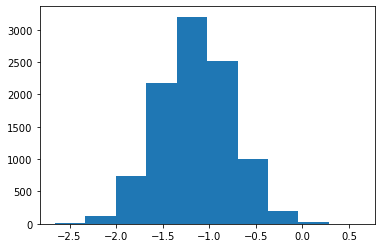

In [72]:
plt.hist(sample_list)

In [73]:
np.percentile(sample_list,2.5)

-1.9090425368876882

In [74]:
np.percentile(sample_list,97.5)

-0.3843903530833608